Support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.

In [2]:
# Import
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
# Data preview
penguins_df = pd.read_csv("data\penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [6]:
# Convert categorical variables into dummy/indicator variables
penguins_df = pd.get_dummies(penguins_df, dtype='int')
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
3,36.7,19.3,193.0,3450.0,1,0
4,39.3,20.6,190.0,3650.0,0,1


In [7]:
# Best practice is to standardize the data for faster convergence
zscaler = StandardScaler()
X = zscaler.fit_transform(penguins_df)
penguins_preprocessed = pd.DataFrame(data=X,columns=penguins_df.columns)
penguins_preprocessed.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,-0.993994,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,1.006042,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,1.006042,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,1.006042,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,-0.993994,0.993994


c:\Users\HT\miniforge3\envs\DS\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\HT\miniforge3\envs\DS\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\HT\miniforge3\envs\DS\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\HT\miniforge3\envs\DS\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have

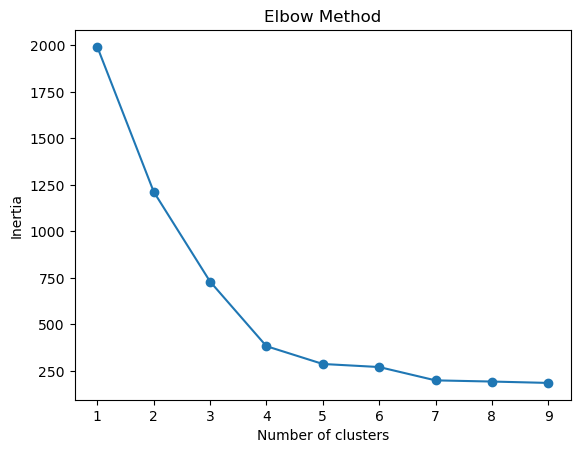

In [10]:
# Detect the optimal number of clusters (k) for k-means clustering
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=314).fit(penguins_preprocessed)
    inertia.append(kmeans.inertia_)    
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [11]:
# Choose 4 clusters by elbow method
n_clusters=4

c:\Users\HT\miniforge3\envs\DS\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


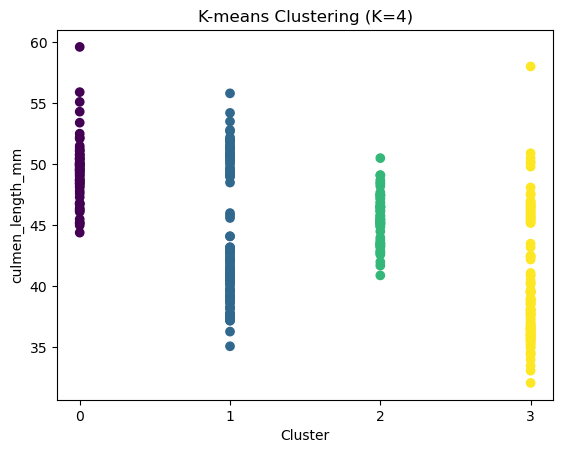

In [12]:
# Run k-means clustering with the optimal number of clusters 
kmeans = KMeans(n_clusters=n_clusters, random_state=314).fit(penguins_preprocessed)
penguins_df['label'] = kmeans.labels_

# Visualize the clusters
plt.scatter(penguins_df['label'], penguins_df['culmen_length_mm'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('culmen_length_mm')
plt.xticks(range(int(penguins_df['label'].min()), int(penguins_df['label'].max()) + 1))
plt.title(f'K-means Clustering (K={n_clusters})')
plt.show()

In [13]:
# Create final `stat_penguins` DataFrame
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_df[numeric_columns].groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,49.473770,15.718033,221.540984
1,43.878302,19.111321,194.764151
2,45.563793,14.237931,212.706897
3,40.217757,17.611215,189.046729
